In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
from pydmd import DMD

In [2]:
import pandas as pd 
train=pd.read_csv('emissions.csv')
train.head()


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train1=train.drop(['ISO 3166-1 alpha-3','Coal','Oil','Gas','Cement','Flaring','Other','Per Capita'],axis=1)

In [4]:
train1.head()

,Country,Year,Total
0,Afghanistan,1750,0.0
1,Afghanistan,1751,0.0
2,Afghanistan,1752,0.0
3,Afghanistan,1753,0.0
4,Afghanistan,1754,0.0


In [5]:
train1 = train1.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
modtrain=train1

In [6]:
# Arranging the data of countries through the years
modtrain1=modtrain.sort_values('Year')

In [7]:
modtrain1.shape

(62904, 3)

In [12]:
train2=train1.drop(['Country','Year'],axis=1)
train2.head()
train2[np.isfinite(train2).all(1)]

,Total
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
63099,36096.739276
63100,36826.506600
63101,37082.558969
63102,35264.085734


In [57]:

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
mega=[]
megatot=[]
megamap=[]
megatru=[]
n=50
cmpyr=2021
l4=train1.Country.unique()
ln=l4[:-1]
for i in range(1,n+1):
    print(i)
    

    megdt=[]
    yr=cmpyr-3
    stp=yr-10

    while yr!=stp:


      
        dt=[]
        for k in ln:
            w=train1[train1.Country==k]
            q1=w[w.Year>yr]
            qq1=q1[q1.Year<cmpyr].T
            #print(q1.shape)
            #q1=w.T
            q2=qq1.drop(['Country','Year'])
            q3=np.array(q2).flatten()
            q4=q3.flatten()
            dt.append(q4)

        dtx=np.array(dt)
        #print(dt.shape)
        dt1=dtx.astype('float')

            
            

        # Implementing DMD 
        #hodmd = DMD(svd_rank=5, tlsq_rank=7,exact=False,opt=True).fit(dt1)
        hodmd=DMD().fit(dt1)
        # svd_rank - number of singular values/vectors to be taken 

        #hodmd.plot_eigs()
        # plotting the eigenvalues from DMD

        #print("Shape before manipulation: {}".format(hodmd.reconstructed_data.shape))
        # Predicting the system for the future 
        hodmd.dmd_time['dt'] *= .25
        hodmd.dmd_time['tend'] *= 0.27
        #print("Shape after manipulation: {}".format(hodmd.reconstructed_data.shape))

        #fig = plt.figure()
        tmdt=hodmd.reconstructed_data # taking the first 182 countries 
        dmd_states = [state for state in tmdt]
        

        dmd_states1=np.nan_to_num(np.array(dmd_states))
        megdt.append(dmd_states1)
        yr=yr-1
        #print(yr)
        #import scipy
        #snapshots=dmd_states.T
        #fig = plt.plot(scipy.linalg.svdvals(np.array([snapshot.flatten() for snapshot in snapshots]).T), 'o')
    
    
    l41=train1.Country.unique()
    ln1=l4[:-1]
    dt6=[]
    for i in ln1:
        w=train1[train1.Country==i]
        q1=w[w.Year==cmpyr].T
        #qq1=q1[q1.Year<2001].T
        #print(q1.shape)
        #q1=w.T
        q2=q1.drop(['Country','Year'])
        q3=np.array(q2).flatten()
        #q4=q3.flatten()
        #q4=q3.flatten()
        dt6.append(q3)
    dt6=np.array(dt6)
    dt6=dt6.astype('float')
    #megdt1=np.array(megdt)
    #megdt2=megdt1.astype('double')
    
    tru=[]
    tot=[]
    map1=[]
    for i in range(len(megdt)):
        #print(i)
        #print(dt6.real)
        #print(megdt[i][:,-1].real)

        MAPE=rmse(dt6.real,megdt[i][:,-1].real)
        TOTAL=np.sum(megdt[i][:,-1]).real
        TRU=np.sum(dt6).real
        tot.append(TOTAL)
        map1.append(MAPE)
    megatru.append(TRU)
    
    cmpyr=cmpyr-1
    mega.append(megdt)
    megatot.append(tot)
    megamap.append(map1)
    #megatru.append(tru)

1


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


2


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


3


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


4


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


5


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


6


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


7


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


8


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


9


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


10


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


11


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


12


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


13


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


14


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


15


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


16


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


17


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


18


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


19


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


20


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]


21


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


22


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]


23


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]


24


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]


25


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]


26


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]
D:\Anaconda\lib\site-packages\pydmd\dmdbase.py:379: RuntimeWarning: invalid value encountered in power
  return np.power(temp, tpow) * self.amplitudes[:, None]


27


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


28


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


29


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


30


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


31


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


32


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


33


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


34


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


35


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


36


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


37


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


38


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


39


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


40


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


41


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


42


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


43


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


44


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


45


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


46


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


47


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


48


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


49


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


50


D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


In [58]:
megatot[27]

[22786.67353925896,
 23075.57513784616,
 23021.487308426193,
 22756.10789914054,
 22512.16979833892,
 21917.828454049108,
 21518.510182874656,
 21289.460769252746,
 21126.0530643425,
 20649.688252768217]

In [59]:
avgs=[]
for j in range(len(megamap[0])):
    s=0
    for i in range(len(megamap)):
        s+=megamap[i][j]
    avg= s / len(megamap)
    avgs.append(avg)
avgs

[1771.0002890744377,
 2735.8968432505953,
 3984.7845217793233,
 5682.296939760263,
 7705.922283320675,
 14301.96550603362,
 12598.540530512433,
 29007.02263179875,
 32727.387283507836,
 27219.000043366785]

In [60]:
#for i in megatru:
    #print(i)

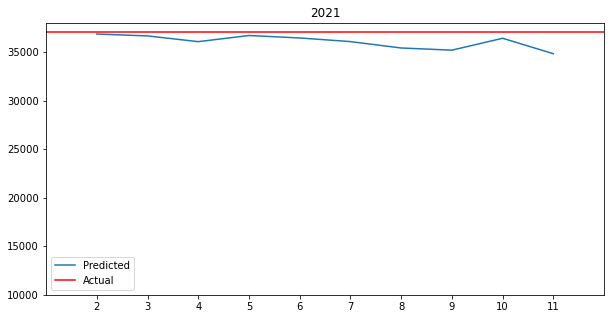

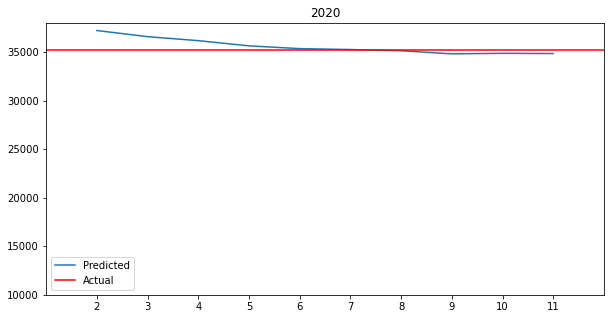

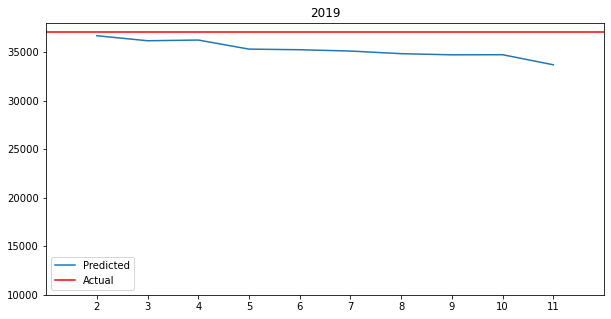

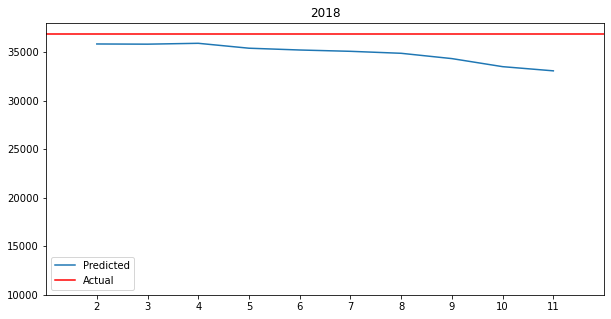

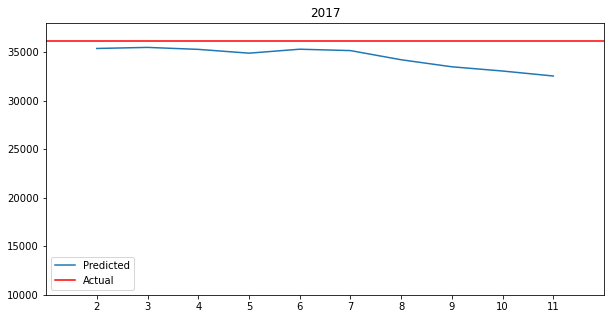

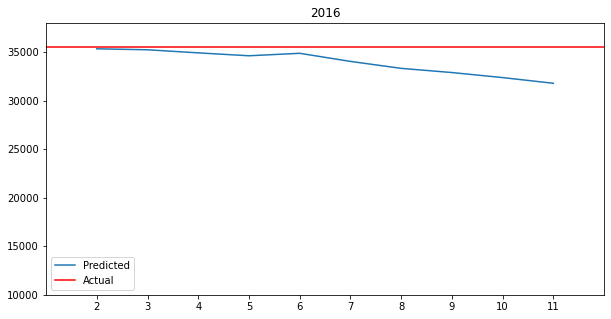

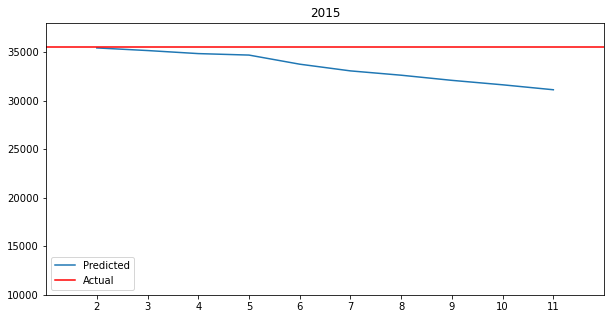

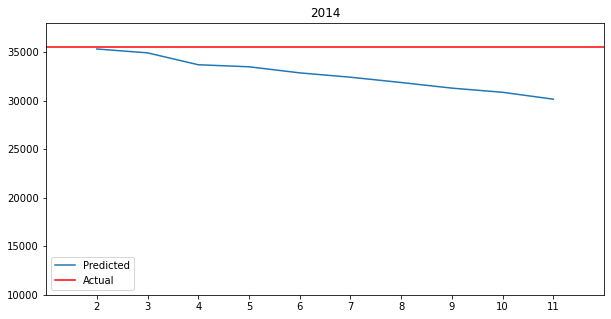

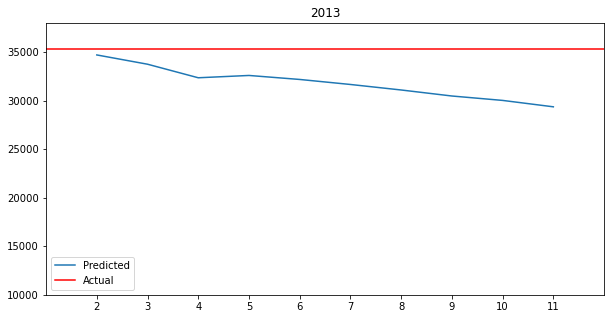

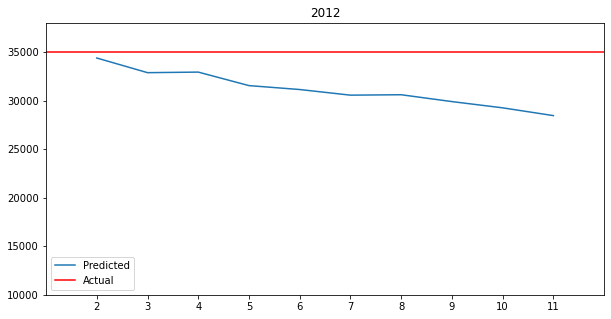

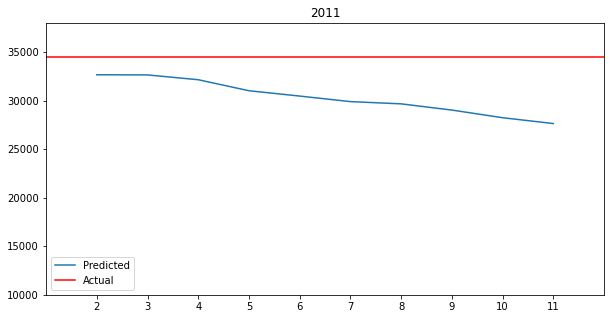

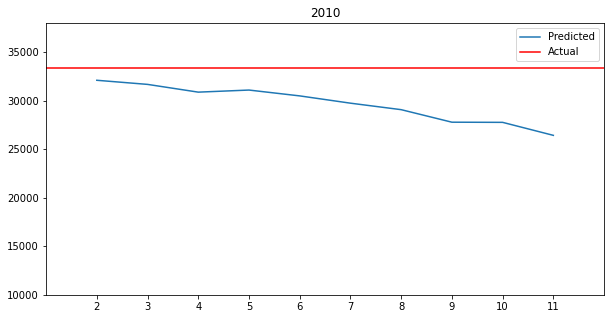

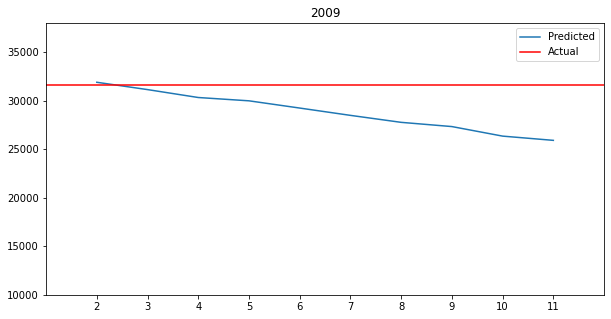

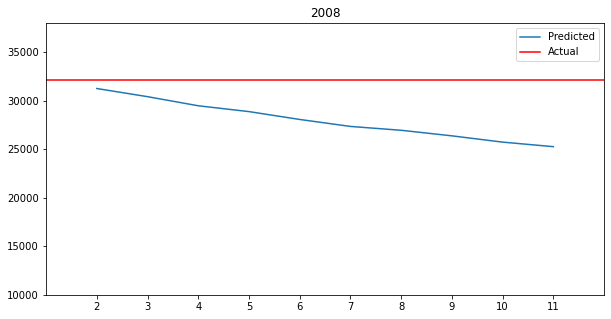

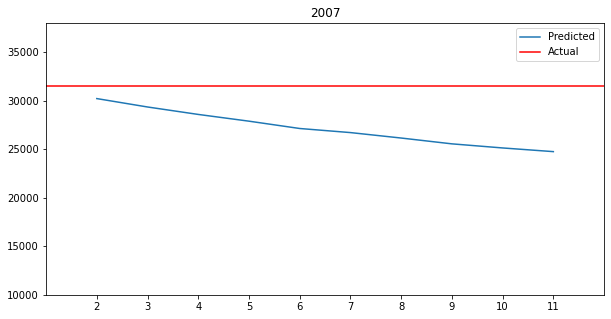

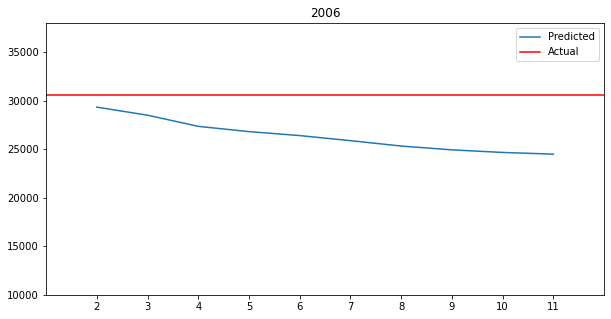

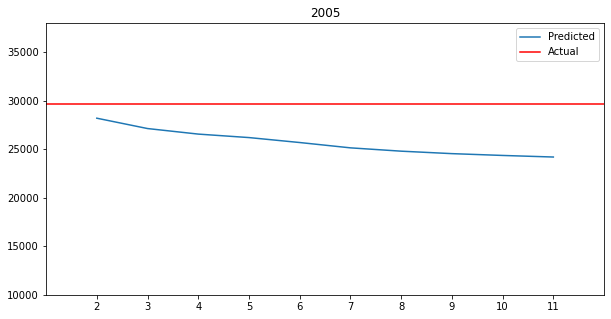

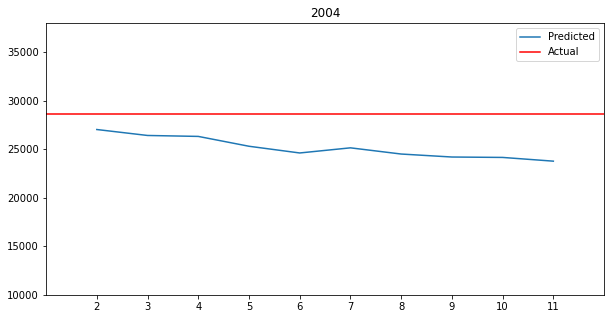

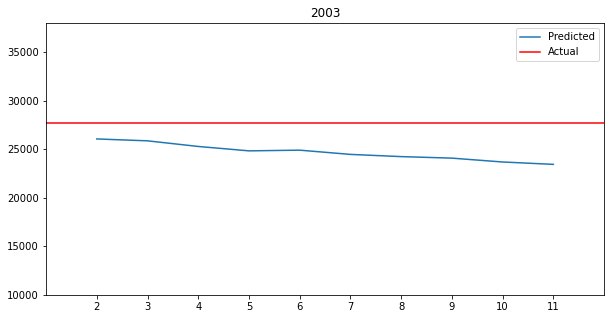

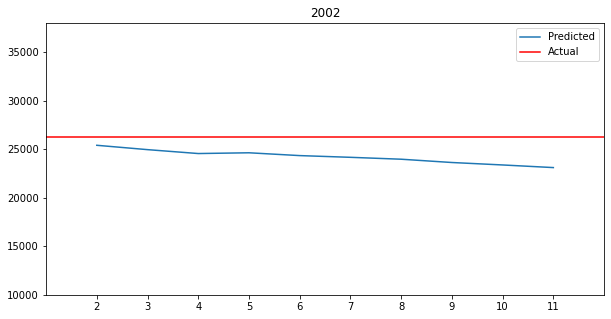

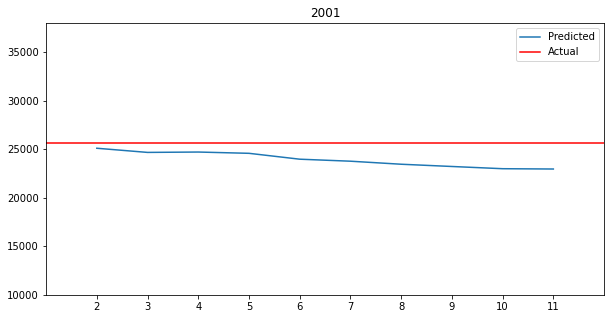

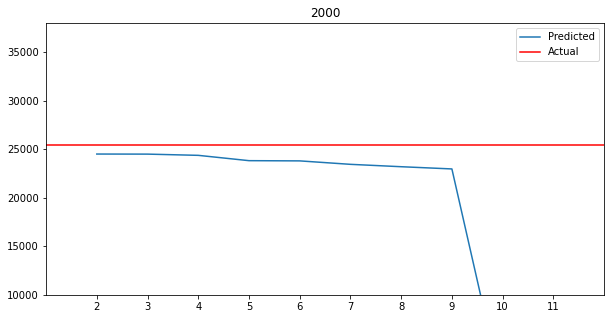

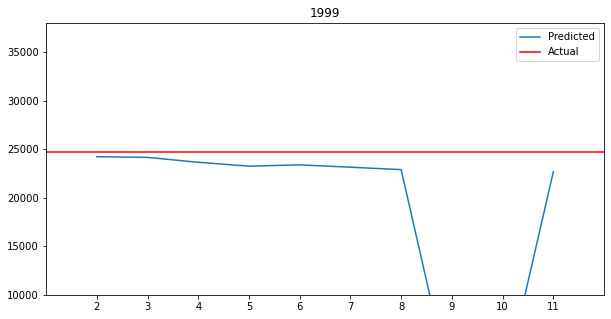

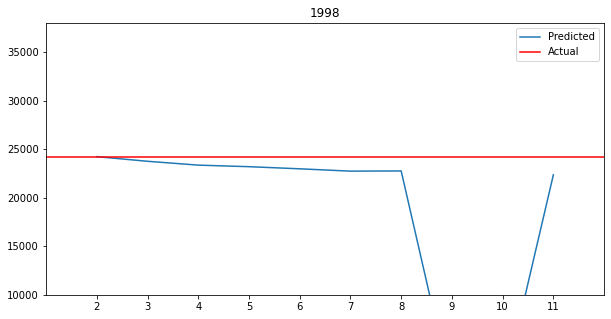

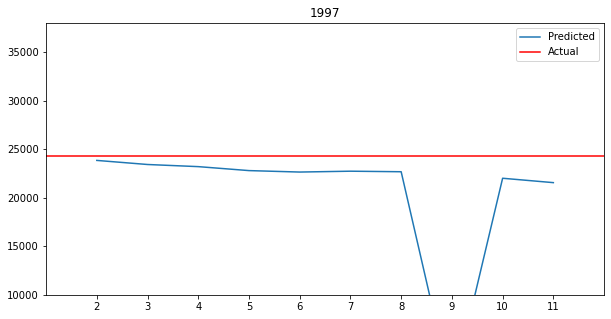

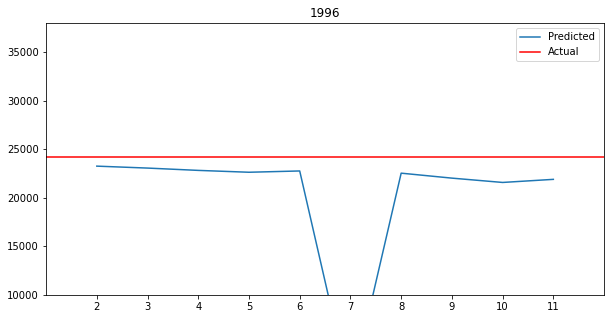

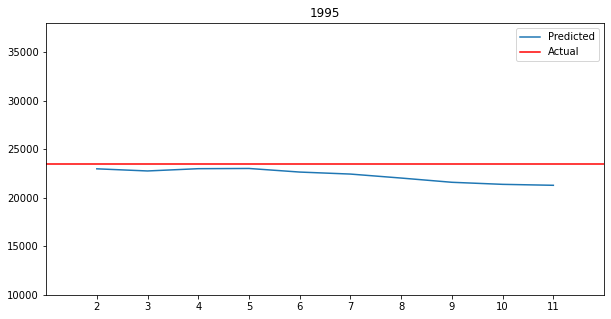

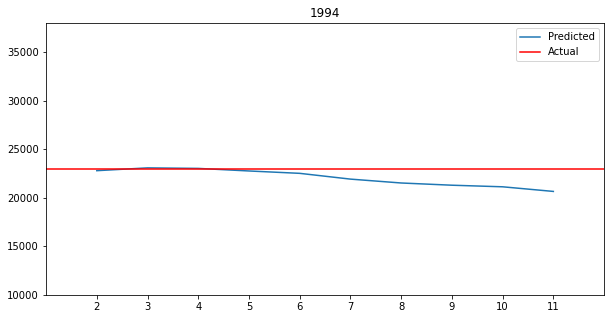

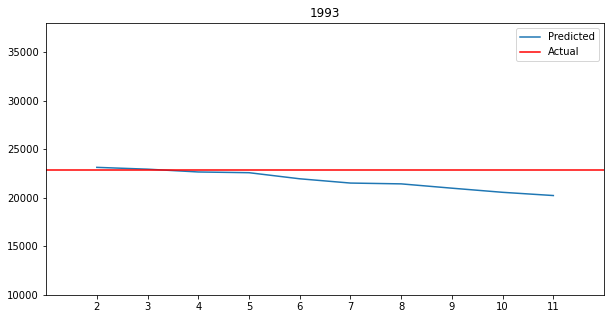

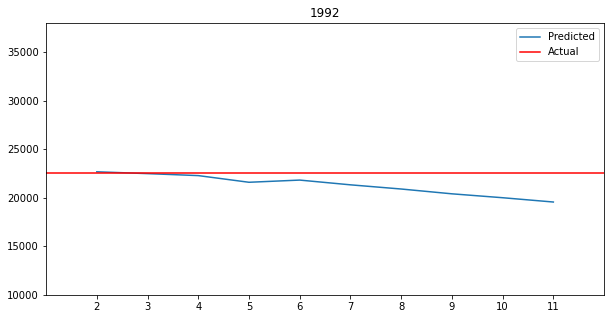

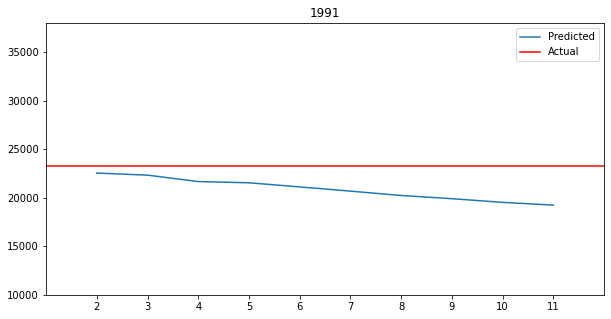

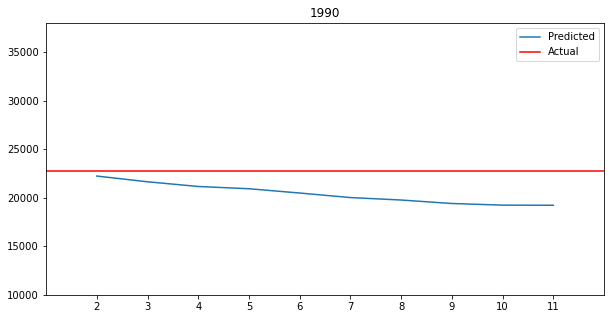

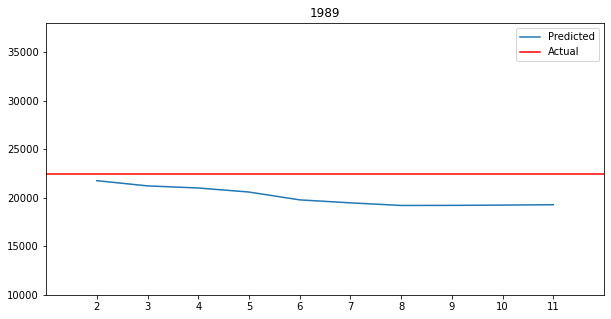

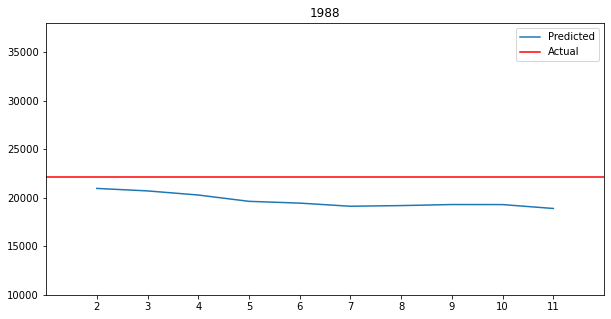

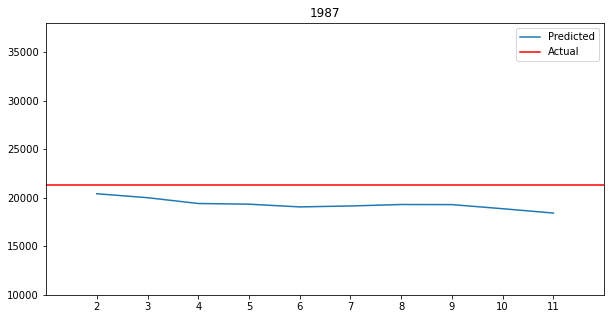

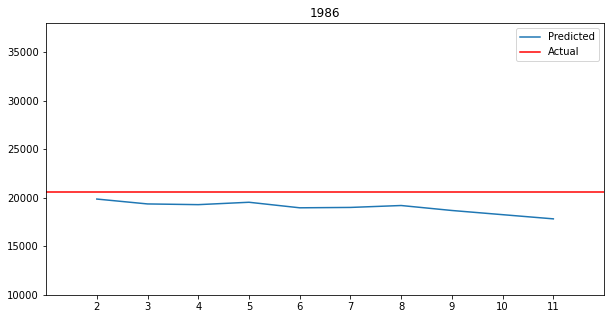

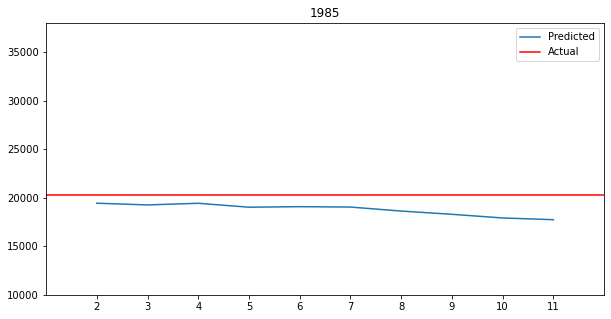

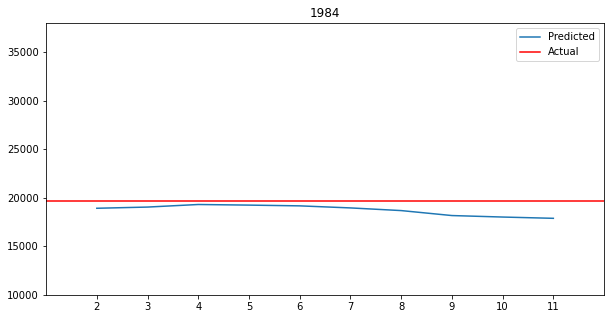

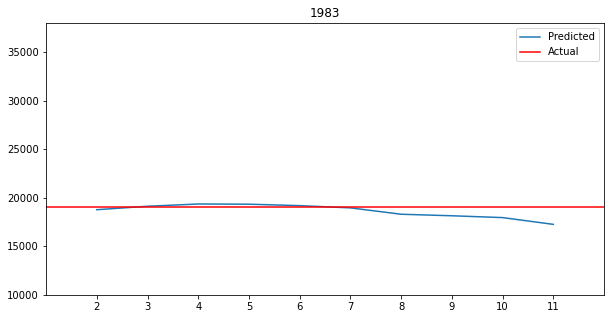

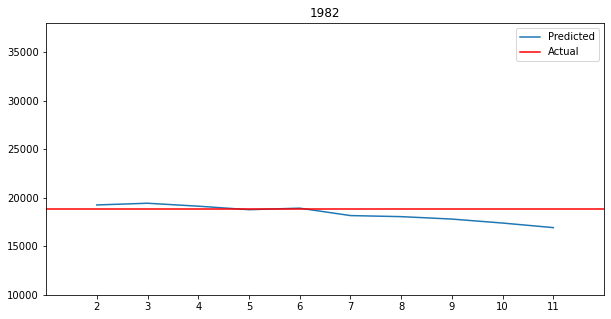

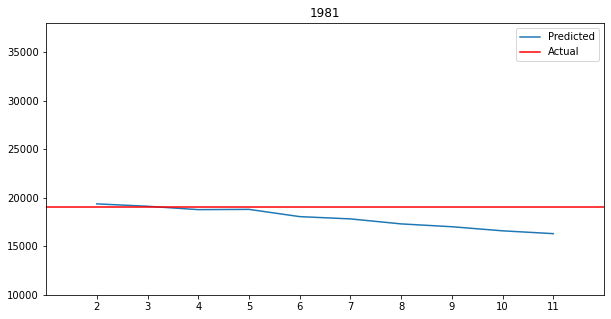

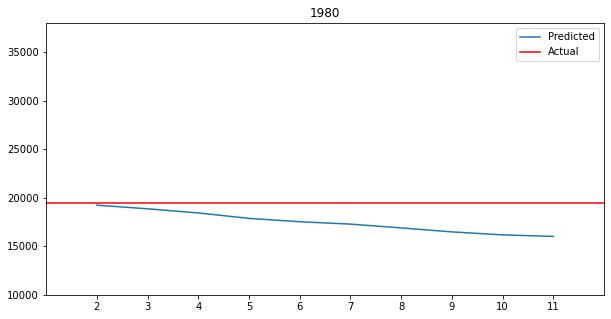

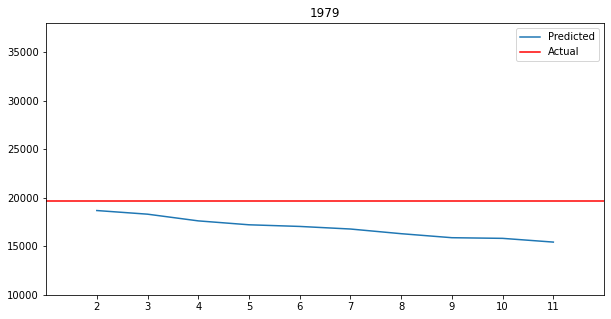

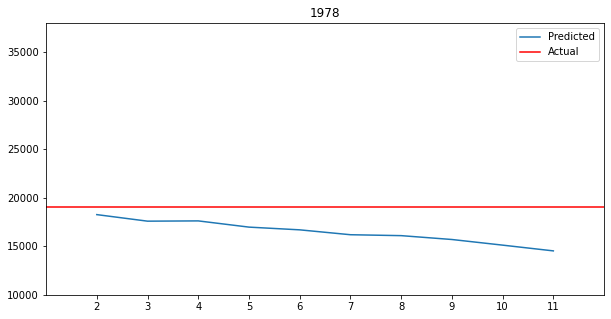

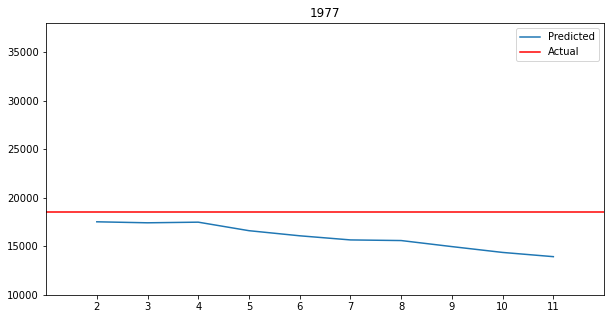

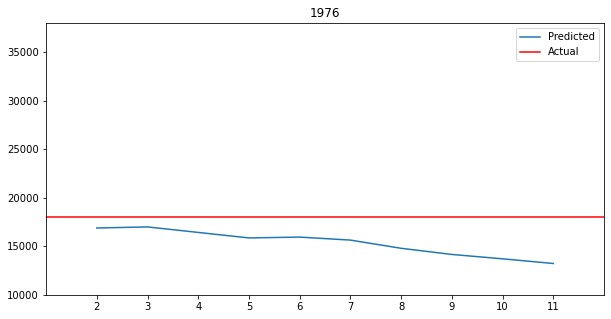

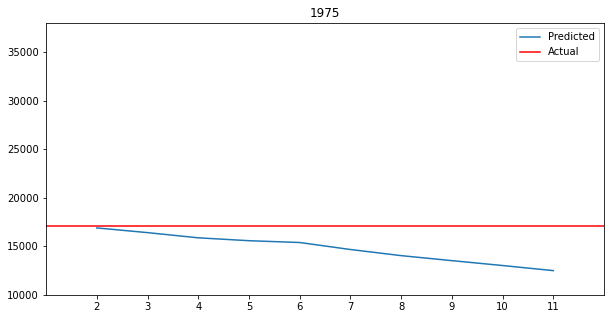

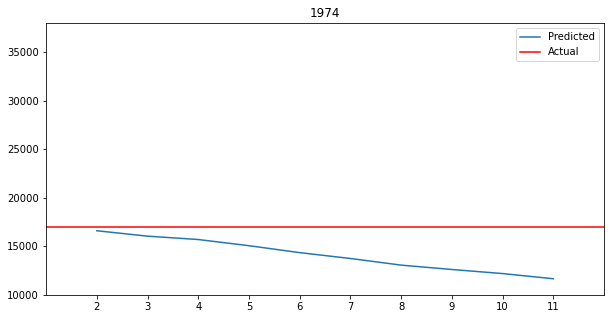

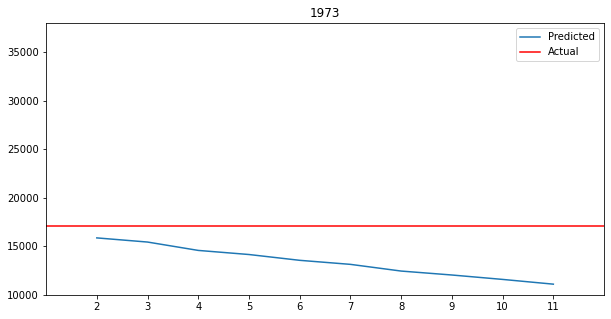

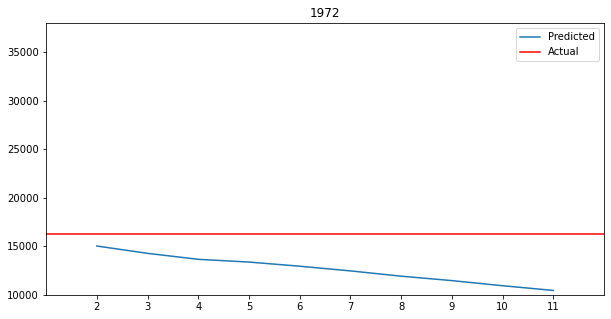

In [62]:
y=2021

for i in range(len(megatru)):
    

    fig2=plt.figure(figsize=(10,5))
    plt.plot([x for x in range(2,12)],megatot[i])
    #plt.plot(np.sum(dt6.real),'r')
    plt.axhline(y=megatru[i], color='r', linestyle='-')
    plt.xticks(np.arange(2,12,1))
    plt.title(y)
    plt.legend(['Predicted','Actual'])
    plt.axis([1,12,10000,38000])
    plt.show()
    y=y-1